
# Analyze "Russia Housing Prices" and predicting them

The goal with the given dataset is to use the data to make a prediction-model after doing an EDA. To achieve this I first come up with some questions I want to answer. Furthermore, I will be using CRISP-DM to structure my work.

## 1. Data Understanding
 For the data understanding the best thing is to use the description of the kaggle-side where the data is from (https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021). This saves quite some time.

The dataset has 13 fields. Each row contains data about an ad for real estate in russia.

- **date**: date of publication of the announcement.
- **time**: the time when the ad was published.
- **geo_lat**: Latitude.
- **geo_lon**: Longitude.
- **region**: Region of Russia. There are 85 subjects in the country in total.
- **building_type**: Facade type. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden.
- **object_type**: Apartment type. 1 - Secondary real estate market; 2 - New building;.
- **level**: Apartment floor.
- **levels**: Number of storeys.
- **rooms**: the number of living rooms. If the value is "-1", then it means "studio apartment".
- **area**: the total area of the apartment in m².
- **kitchen_area**: - Kitchen area in m².
- **price**: Price in rubles.


In [3]:
import dateutil.utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler
import time
import warnings
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv('all_v2.csv')
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.date
temp = pd.to_datetime(df.time, format='%H:%M:%S').apply(lambda d : d.time())
df.time = temp

In [5]:
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


In [6]:
df.describe(datetime_is_numeric=True)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


In [7]:
df.object_type.value_counts()

1     3863809
11    1613197
Name: object_type, dtype: int64

In [8]:
df.isnull().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


With the code blocks above, we can measure the data quality:
- **Correctness**: The data is not entirely correct since we got e.g. prices that are negative and object_type seems not to be quite correct since they do not match with the given description. These can be fixed in the data preparation phase.
- **Completeness**: The data seems to be complete.
- **Redundancy**: For now I cannot spot any redundancies.

## 2. Data Preparation

After spotting some flaws in the data understanding phase, we tackle those in the upcoming phase. The first thing to be done is deleting the negative prices and rooms. From the data description we can also see that the columns `object_type` and `building_type` are "encoded". For further analysis it makes sense to replace the numbers with their string representations.

In [10]:
df = df[df.price>0]

In [11]:
df= df[df.rooms>0]

In [12]:
df['building_type']= df['building_type'].replace([0,1,2,3,4,5],['Other','Panel','Monolithic','Brick','Blocky','Wooden'])

In [13]:
df['object_type']= df['object_type'].replace([1,11],['Secondary Real Estate Market','New Building'])

The other problem we have is that the price is represented in russian rubel, which is obvious since we got a dataset about russian housing prices. For me, it still makes much more sense to analyze the data in euro. Because we have a date for each entry which ranges from spring 2018 to early summer 2021, we need different exchange rates from those years. I acquired them from the website of the European Central Bank (https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=120.EXR.D.RUB.EUR.SP00.A).

In [14]:
df_exchange = pd.read_csv('amCharts.csv', sep= ';')
df_exchange = df_exchange.rename(columns={'s1':'rate'})
df_exchange.date = pd.to_datetime(df_exchange.date)
df_exchange.date = df_exchange.date.dt.date

Next up we have to convert the rate to an actual rate, because now it just represents the value of 1 euro in rubel.

In [15]:
df_exchange.rate = 1/df_exchange.rate

Now we map the exchange rate to the housing price df. After that the price gets transformed to euro, and we drop the rate column again.

In [16]:
df = df.merge(df_exchange, left_on='date', right_on='date')
df.price = df.price * df.rate
df.price = df.price.round(2)
df = df.drop(["rate"], axis=1)
df.price.max()

29093406.87

The next step is to calculate the price per square metre. That way we can compare different properties which differ in size.

In [17]:
df["price_per_square_metre"] = (df["price"]/df["area"]).round(2)
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_per_square_metre
0,86341.12,2018-02-19,20:00:21,59.805808,30.376141,2661,Panel,8,10,3,82.6,10.8,Secondary Real Estate Market,1045.29
1,125731.31,2018-02-27,12:04:54,55.683807,37.297405,81,Brick,5,24,2,69.1,12.0,Secondary Real Estate Market,1819.56
2,58178.43,2018-02-28,15:44:00,56.295250,44.061637,2871,Panel,5,9,3,66.0,10.0,Secondary Real Estate Market,881.49
3,26742.30,2018-03-01,11:24:52,44.996132,39.074783,2843,Blocky,12,16,2,38.0,5.0,New Building,703.74
4,78781.36,2018-03-01,17:42:43,55.918767,37.984642,81,Brick,13,14,2,60.0,10.0,Secondary Real Estate Market,1313.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082498,49608.21,2021-04-30,23:56:39,59.880305,30.472474,2661,Panel,1,5,1,31.0,7.4,Secondary Real Estate Market,1600.26
4082499,115752.48,2021-04-30,23:56:41,57.567523,39.921776,2604,Brick,7,8,3,119.0,18.0,New Building,972.71
4082500,34174.54,2021-04-30,23:57:33,54.963499,48.265301,2922,Brick,1,4,4,99.0,9.0,Secondary Real Estate Market,345.20
4082501,48505.80,2021-04-30,23:58:33,50.256918,127.554152,7929,Panel,5,5,2,46.0,8.0,Secondary Real Estate Market,1054.47


For some easier comparison, I decided to add a value that just represents the latitude and longitude. This can be then used as a somewhat key for properties that are listed, although we have to keep in mind that some properties have more than one apartment/unit.

In [18]:
df['point'] = df[['geo_lat','geo_lon']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)


In [19]:
df.price.max()

29093406.87

In [20]:
df.describe()

,price,geo_lat,geo_lon,region,level,levels,rooms,area,kitchen_area,price_per_square_metre
count,4.082503e+06,4.082503e+06,4.082503e+06,4.082503e+06,4.082503e+06,4.082503e+06,4.082503e+06,4.082503e+06,4.082503e+06,4.082503e+06
mean,5.839654e+04,5.401953e+01,5.291084e+01,4.244222e+03,6.205361e+00,1.132971e+01,1.887192e+00,5.504911e+01,1.090842e+01,1.023316e+03
std,1.776038e+05,4.643517e+00,2.056953e+01,3.242760e+03,4.935791e+00,6.539783e+00,8.794488e-01,3.328981e+01,1.062829e+01,4.821175e+03
min,1.000000e-02,4.145906e+01,1.990309e+01,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e-02,1.000000e-02,0.000000e+00
25%,2.597995e+04,5.334998e+01,3.778513e+01,2.661000e+03,2.000000e+00,5.000000e+00,1.000000e+00,3.920000e+01,7.300000e+00,5.603500e+02
50%,3.895195e+04,5.518702e+01,4.299740e+01,2.922000e+03,5.000000e+00,1.000000e+01,2.000000e+00,4.900000e+01,1.000000e+01,7.817600e+02
75%,6.275826e+04,5.627372e+01,6.556124e+01,6.171000e+03,9.000000e+00,1.600000e+01,2.000000e+00,6.400000e+01,1.292000e+01,1.151160e+03
max,2.909341e+07,7.198040e+01,1.625361e+02,6.188800e+04,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,6.875848e+06


Next up, we have still some implausible values in the price. The min value of the price says it is 0.01, which cannot me quite true.

In [21]:
round((len(df[df.price<df.price.mean()*0.1])/len(df))*100, 2)


0.26

In [22]:
df.isna().sum()

price                     0
date                      0
time                      0
geo_lat                   0
geo_lon                   0
region                    0
building_type             0
level                     0
levels                    0
rooms                     0
area                      0
kitchen_area              0
object_type               0
price_per_square_metre    0
point                     0
dtype: int64

In [23]:
df = df[df.price>df.price.mean()*0.1]

 To deal with outliers, I decided to look at the amount of entries that have a price that is only 10% of the overall mean. Since these values only represent 0.26% of the overall entries, I made the decision to drop them. The next outliers we have are the maximum prices, which are way over 75% of the prices. This seems to be plausible since there are always more expensive homes. We should look at how much are over half million euros and thus be categorized as expensive estate.

Also, I made an export of the csv at this point because I used the cleansed data to create a dashboard.

In [24]:
df.to_csv("cleaned_housing_price.csv")

In [25]:
round((len(df[(df.price>75000) & (df.price<500000)])/len(df))*100, 2)

18.37

0.29% isn't really much, and we drop them out of the df. Instead of deleting them completely, I put them in a separated df for further analysis.

In [26]:
df_expensive = df[df.price>500000]

In [27]:
df = df[df.price<500000]

In [28]:
len(df[df.price>65000])

948672

This should finish up the data preparation phase.

## 3. Exploratory Data Analysis (EDA)
Next we're going to get better insight in the data by doing an EDA. The main goal of the EDA is to explore the sqm price of the different object types and building types. We're going to start with the building type and then move to cities. We're going to use the seaborn library for the visualizations.


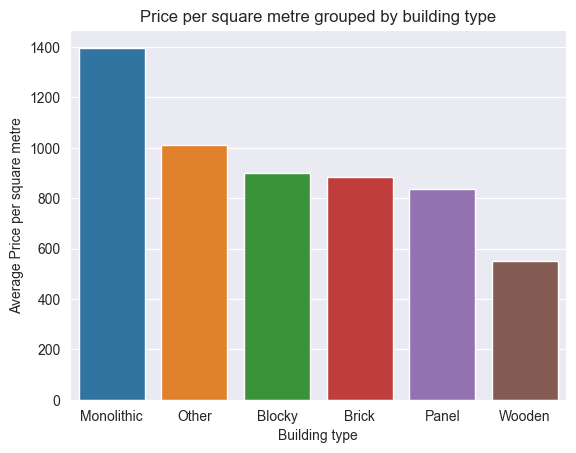

In [29]:
#calculate mean of price per square metre grouped by building type and plot
sns.barplot(x=df.groupby(['building_type'])['price_per_square_metre'].mean().sort_values(ascending=False).index, y=df.groupby(['building_type'])['price_per_square_metre'].mean().sort_values(ascending=False).values)
plt.title('Price per square metre grouped by building type')
plt.xlabel('Building type')
plt.ylabel('Average Price per square metre')
plt.show()

Compared by the mean, the monolithic building type is the most expensive. The wooden building type is the cheapest. The building type other is on the second place.  Brick, Blocky and Panel are in the middle. Those buildings are represented the most as well. This makes sense since they are the most common building types in Russia. The wooden building type is the least common building type, but it is still the cheapest. This could be because the wooden building type is the oldest building type and therefore the cheapest. The other building types are newer and therefore more expensive.

In [30]:
#filter the data for all buildings in and around Moscow region and all other buildings based on geo_lat and geo_lon
df_moscow = df[(df.geo_lat>55.5) & (df.geo_lat<56.5) & (df.geo_lon>36.5) & (df.geo_lon<38.5)]
df_other = df[(df.geo_lat<55.5) | (df.geo_lat>56.5) | (df.geo_lon<36.5) | (df.geo_lon>38.5)]

Next up compare a region, since the location can influence the price as well.

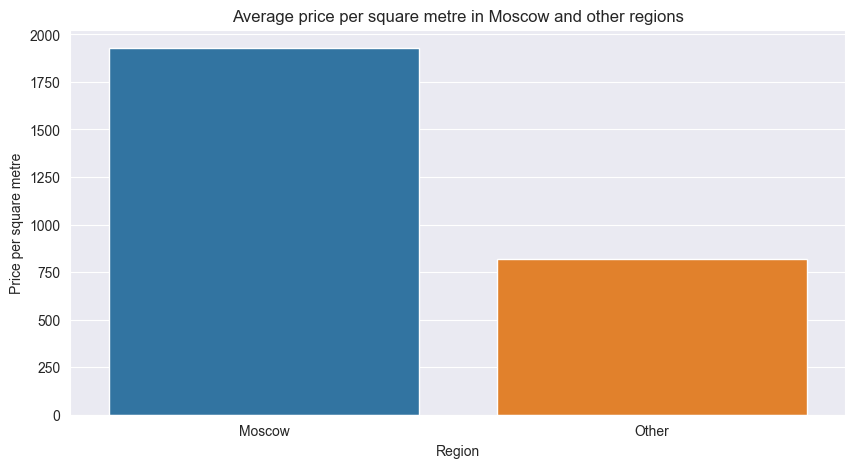

In [31]:
# bar plot the overall average price per square metre for df_moscow and df_other
plt.figure(figsize=(10,5))
sns.barplot(x=['Moscow', 'Other'], y=[df_moscow.price_per_square_metre.mean(), df_other.price_per_square_metre.mean()])
plt.title('Average price per square metre in Moscow and other regions')
plt.xlabel('Region')
plt.ylabel('Price per square metre')
plt.show()


 We can see that the average price per square metre in Moscow is 2.5 times higher than in other regions. This is probably because of the high demand for housing in Moscow. The supply is limited, and the prices are high. In other regions, the supply is higher, and the prices are lower. Since moscow is by far the biggest city I took a look at the top 5 cities with the most entries.

In [32]:
df_st_petersburg = df[(df.geo_lat>59.5) & (df.geo_lat<60.5) & (df.geo_lon>29.5) & (df.geo_lon<31.5)]
df_novosibirsk = df[(df.geo_lat>54.5) & (df.geo_lat<55.5) & (df.geo_lon>82.5) & (df.geo_lon<83.5)]
df_ekaterinburg = df[(df.geo_lat>56.5) & (df.geo_lat<57.5) & (df.geo_lon>58.5) & (df.geo_lon<59.5)]
df_nizhny_novgorod = df[(df.geo_lat>56.5) & (df.geo_lat<57.5) & (df.geo_lon>43.5) & (df.geo_lon<44.5)]
#create a df without the top 5 cities df
df_without_top_5_cities = df[(df.geo_lat<59.5) | (df.geo_lat>60.5) | (df.geo_lon<29.5) | (df.geo_lon>31.5) & (df.geo_lat<54.5) | (df.geo_lat>55.5) | (df.geo_lon<82.5) | (df.geo_lon>83.5) & (df.geo_lat<56.5) | (df.geo_lat>57.5) | (df.geo_lon<58.5) | (df.geo_lon>59.5) & (df.geo_lat<56.5) | (df.geo_lat>57.5) | (df.geo_lon<43.5) | (df.geo_lon>44.5)]

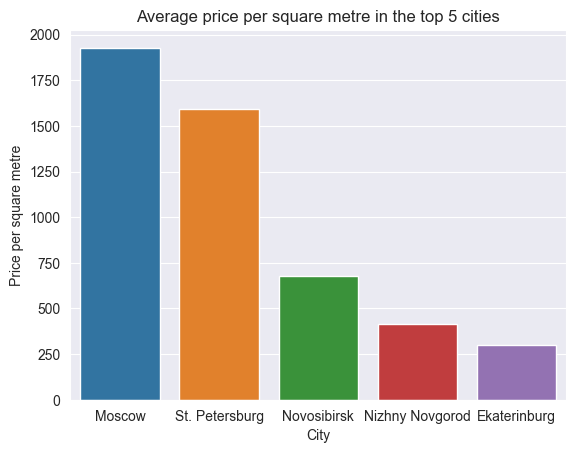

In [33]:
#plot the average price per square metre for the top 5 cities and other and order them descanding
#put the top 5 cities mean price per square metre in a df
top_5_cities_mean_ppsm = pd.DataFrame({'city':['Moscow','St. Petersburg', 'Novosibirsk', 'Ekaterinburg', 'Nizhny Novgorod'], 'price_per_square_metre':[df_moscow.price_per_square_metre.mean(),df_st_petersburg.price_per_square_metre.mean(), df_novosibirsk.price_per_square_metre.mean(), df_ekaterinburg.price_per_square_metre.mean(), df_nizhny_novgorod.price_per_square_metre.mean()]})
top_5_cities_mean_ppsm = top_5_cities_mean_ppsm.sort_values('price_per_square_metre', ascending=False)
#plot the top 5 cities mean price per square metre
sns.barplot(x='city', y='price_per_square_metre', data=top_5_cities_mean_ppsm)
plt.title('Average price per square metre in the top 5 cities')
plt.xlabel('City')
plt.ylabel('Price per square metre')
plt.show()

By comparing the five biggest city we can see that only the capital and St. Petersburg have a higher price per square metre than the other regions. The other 3 cities have lower prices than the other regions. So it is safe to say that region does matter for the price per square metre, but it is not by the size of the city. The size of the city is not the only factor that influences the price per square metre. Since we know that the building type heavily influences the price per square metre, I decided to take a look at the building types in the top 5 cities. For comparison the plot above gets repeated for the building types.

In [34]:
df_building_type = pd.DataFrame()
#for loop
for df in [df_moscow, df_ekaterinburg, df_novosibirsk, df_nizhny_novgorod, df_st_petersburg]:
    #get the building type
    df_building_type = pd.concat([df_building_type, df.building_type.value_counts()], axis=1)
#rename the columns to the city names
df_building_type.columns = ['moscow', 'ekaterinburg', 'novosibirsk', 'nizhny_novgorod', 'st_petersburg']
#normalize the values
df_building_type = df_building_type/df_building_type.sum()
#convert to percent and round by 2
df_building_type = df_building_type.apply(lambda x: round(x*100,2))
#order by moscow, st petersburg, novosibirsk, nizhny novgorod, ekaterinburg
df_building_type = df_building_type[['moscow', 'st_petersburg', 'novosibirsk', 'nizhny_novgorod', 'ekaterinburg']]
# invert df_building_type
df_building_type = df_building_type.T

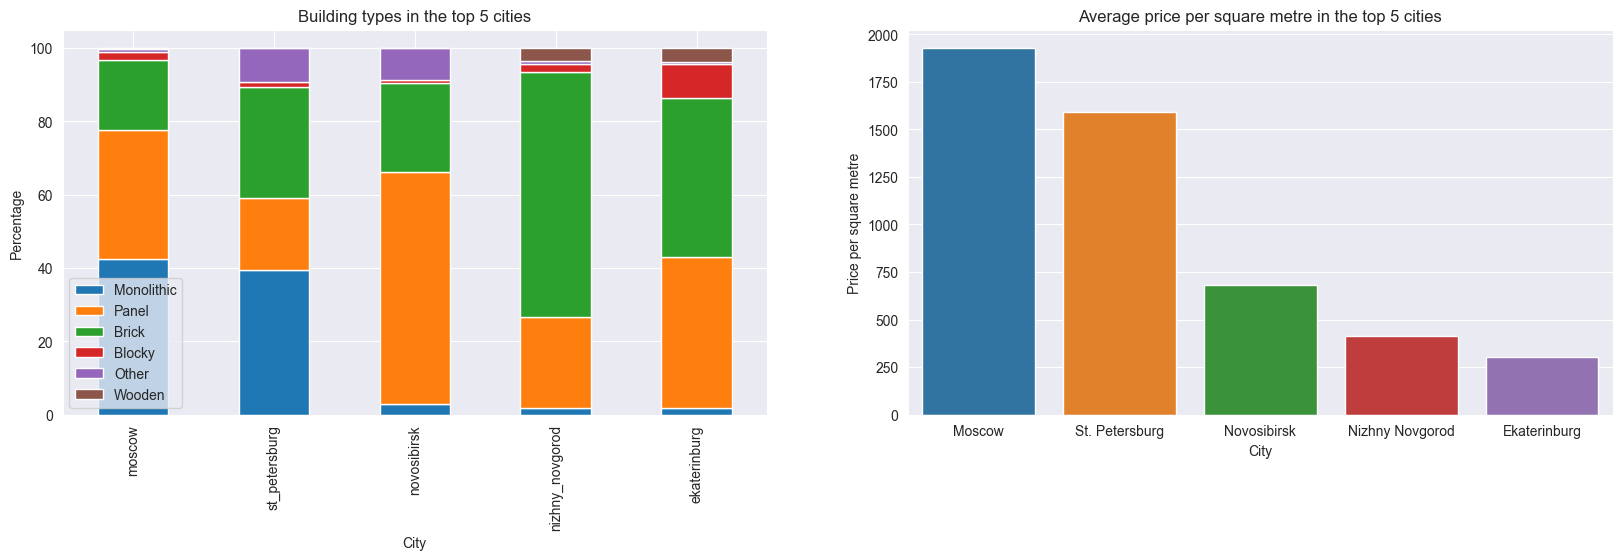

In [35]:
# plot the building types as stacked bar plot and the top_5_cities_mean_ppsm as a seperate bar plot
fig, ax =plt.subplots(1,2)
fig.set_size_inches(20,5)
#plot the building types
df_building_type.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Building types in the top 5 cities')
ax[0].set_xlabel('City')
ax[0].set_ylabel('Percentage')
#plot the top 5 cities mean price per square metre
sns.barplot(x='city', y='price_per_square_metre', data=top_5_cities_mean_ppsm, ax=ax[1])
ax[1].set_title('Average price per square metre in the top 5 cities')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Price per square metre')
plt.show()


After analyzing the data on building types and average price per square metre in the top 5 cities, it is evident that building type is a crucial factor that affects the sqm
price. The data shows that Moscow and St. Petersburg have significantly higher average sqm prices compared to the other cities, and this can be attributed to their relatively high percentage of monolithic buildings. Previous plots have indicated that monolithic buildings are the most expensive building type. Therefore, it is safe to say that the building type has a significant influence on the price per square metre.

However, it is essential to note that building type is not the only factor that affects the price per square metre. Other factors such as the region can also have an impact on the price. For instance, although St. Petersburg has a similar structure of building types to Moscow, it has a lower overall building price. This suggests that the region can also be a crucial factor in determining the price per square metre.

It is also worth noting that although the distribution of Panel and Brick building types is different in these cities, they have similar prices. Therefore, while building type is an essential factor, it is not the only determinant of the price per square metre, and other factors such as the region and market demand should also be considered.

## 4. Modelling
For the modelling phase I decided to use a the tensorflow package.

Before I start modelling I need to do some data preprocessing necessary for the model. Basically some normalization and one hot encoding is done here.

In [36]:
df_transform = df
#drop the time and price column
df_transform = df_transform.drop('price', axis=1)
df_transform = df_transform.drop('time', axis=1)
df_transform = df_transform.drop('point', axis=1)

In [37]:
# map the building type and object type to numbers
df_transform.building_type = df_transform.building_type.rank(method='dense', ascending=False).astype(int)
df_transform.object_type = df_transform.object_type.rank(method='dense', ascending=False).astype(int)



In [38]:
#normalize date column
df_transform.date = pd.to_datetime(df_transform.date).astype('int64')
max_a = df_transform.date.max()
min_a = df_transform.date.min()
min_norm = -1
max_norm =1
df_transform.date = (df_transform.date- min_a) *(max_norm - min_norm) / (max_a-min_a) + min_norm

In [39]:
df_transform[['date', 'geo_lon', 'geo_lat', 'area', 'kitchen_area', 'price_per_square_metre']] = df_transform[['date', 'geo_lon', 'geo_lat', 'area', 'kitchen_area', 'price_per_square_metre']].astype('float32')

df_transform

,date,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price_per_square_metre
0,-1.000000,59.805809,30.376141,2661,2,8,10,3,82.599998,10.800000,1,1045.290039
27,-0.914237,59.827465,30.201826,2661,2,7,9,1,31.000000,7.000000,1,1332.619995
33,-0.891938,59.988335,29.786928,2661,5,3,3,3,89.000000,10.000000,1,965.380005
35,-0.888508,59.900242,30.520712,3446,5,18,25,1,35.000000,11.500000,1,1275.589966
46,-0.842196,60.011173,30.243795,2661,5,7,12,3,69.000000,11.000000,1,1422.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
4082452,1.000000,60.036888,30.226122,2661,4,23,23,2,55.000000,19.299999,1,2184.770020
4082475,1.000000,59.920593,30.498753,2661,2,3,9,2,45.000000,7.000000,1,1592.359985
4082483,1.000000,59.907364,30.521654,3446,4,14,22,1,33.000000,9.000000,1,1603.500000
4082498,1.000000,59.880306,30.472473,2661,2,1,5,1,31.000000,7.400000,1,1600.260010


Create train and test set

In [40]:
# create train and test set
train_df = df_transform.sample(frac=0.8, random_state=0)
test_df = df_transform.drop(train_df.index)
#seperate the target variable from the train and test set
train_labels = train_df.pop('price_per_square_metre')
test_labels = test_df.pop('price_per_square_metre')
train_df

,date,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
2617443,0.315609,59.928486,30.286610,2661,5,5,6,5,151.000000,17.500000,1
1307725,-0.248714,59.858315,30.149599,2661,4,15,22,3,103.800003,26.200001,2
3021091,0.488851,59.983795,30.397678,2661,5,3,16,2,51.200001,7.900000,1
2389335,0.212693,59.892811,30.449312,2661,2,3,14,1,38.599998,9.200000,1
2369305,0.202401,59.850620,30.373632,2661,2,1,5,2,45.299999,7.400000,1
...,...,...,...,...,...,...,...,...,...,...,...
3822827,0.903945,59.903870,30.436359,2661,4,5,18,1,47.900002,22.400000,2
2363352,0.200686,59.988564,30.304836,2661,5,5,5,2,52.900002,8.000000,1
1399773,-0.207547,60.135090,30.173475,2661,2,4,5,3,66.000000,9.000000,1
4057698,0.998285,59.957027,30.270123,2661,5,2,8,3,143.000000,36.599998,1


In [41]:
#normalize the data
normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_df))
print(normalizer.mean.numpy())

[[1.8121226e-01 5.9934982e+01 3.0331141e+01 2.7244812e+03 3.8416905e+00
  7.5265365e+00 1.4249058e+01 1.8893987e+00 5.8264801e+01 1.2828177e+01
  1.4106718e+00]]


In [42]:
first = np.array(train_df[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   0.32   59.93   30.29 2661.      5.      5.      6.      5.    151.
    17.5     1.  ]]

Normalized: [[ 0.28 -0.07 -0.34 -0.3   1.05 -0.45 -1.17  3.39  2.39  0.7  -0.83]]


### 4.1 Linear regression

To start with the actual modelling phase, I took a linear regression approach. For my prediction model I will try different approaches and compare the results. The first approach is a simple linear regression model. The model is trained on the training set and the results are evaluated on the test set. The results are then compared to the actual values.

In [43]:
selected_features_linear_model = np.array

In [44]:
linear_model = keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [45]:
linear_model.predict(train_df[:10])

1/1 [==============================] - 0s 59ms/step


array([[-0.6803585 ],
       [-2.4524875 ],
       [ 0.2677635 ],
       [ 1.2609802 ],
       [ 1.9226338 ],
       [ 1.3754764 ],
       [ 2.6981921 ],
       [-0.32206777],
       [ 0.10938764],
       [ 0.70991933]], dtype=float32)

In [46]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.66081566],
       [ 0.33491272],
       [ 0.40262038],
       [-0.35366684],
       [-0.6946097 ],
       [-0.07790542],
       [-0.36324042],
       [ 0.4726519 ],
       [-0.55126154],
       [-0.5457312 ],
       [ 0.5344266 ]], dtype=float32)>

In [47]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'accuracy'])

history = linear_model.fit(
    train_df,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,accuracy,val_loss,val_mean_absolute_error,val_accuracy,epoch
95,325.763428,325.763428,0.0,326.105927,326.105927,0.0,95
96,325.768036,325.768036,0.0,326.161194,326.161194,0.0,96
97,325.764130,325.764130,0.0,326.109589,326.109589,0.0,97
98,325.753876,325.753876,0.0,326.141510,326.141510,0.0,98
99,325.763763,325.763763,0.0,326.068848,326.068848,0.0,99


<Axes: xlabel='epoch'>

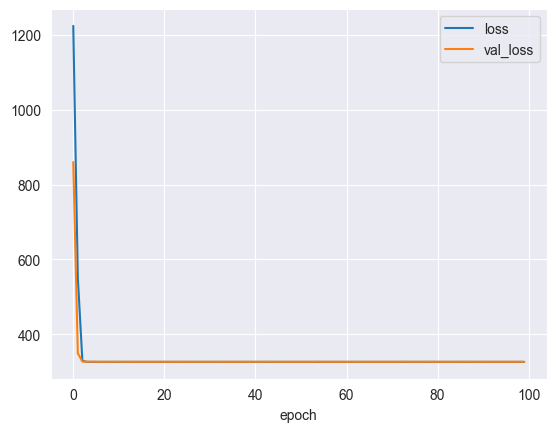

In [49]:
#plot the loss and val_loss of hist[epoch]
hist.plot(x='epoch', y=['loss', 'val_loss'])


In [50]:
#collect test results for later
test_results = {}
test_results['linear model'] = linear_model.evaluate(
    test_df, test_labels, verbose=0)


### 4.2 DNN regression
Next up, I wanted to try a DNN regression model. The same training and test set is used as for the linear regression model.

In [51]:
dnn_model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [52]:
history = dnn_model.fit(
    train_df, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

<Axes: xlabel='epoch'>

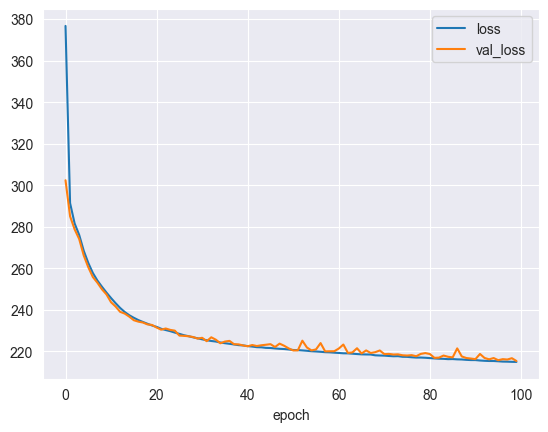

In [53]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
hist.plot(x='epoch', y=['loss', 'val_loss'])


In [54]:
test_results['dnn model'] = dnn_model.evaluate(
    test_df, test_labels, verbose=0)

In [55]:
test_results

{'linear model': [321.8163757324219, 321.8163757324219, 0.0],
 'dnn model': 212.19781494140625}

### 4.3 DNN regression with more neurons

In [56]:
dnn_model_more_neurons = keras.Sequential([
    normalizer,
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1)
  ])

dnn_model_more_neurons.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [57]:
history = dnn_model_more_neurons.fit(
    train_df, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

<Axes: xlabel='epoch'>

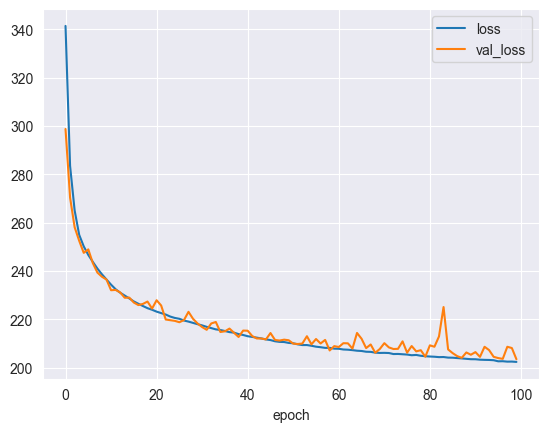

In [58]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
hist.plot(x='epoch', y=['loss', 'val_loss'])

In [59]:
test_results['dnn model more neurons'] = dnn_model_more_neurons.evaluate(
    test_df, test_labels, verbose=0)

In [60]:
test_results

{'linear model': [321.8163757324219, 321.8163757324219, 0.0],
 'dnn model': 212.19781494140625,
 'dnn model more neurons': 200.63766479492188}

An increase in the number of neurons does seem to improve the results, but not by much. The loss is still quite high. I will try to improve the results by adding more layers with the same amount of neurons.

In [61]:
dnn_model_more_layers = keras.Sequential([
    normalizer,
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1)
    ])


In [62]:
dnn_model_more_layers.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [63]:
history = dnn_model_more_layers.fit(
    train_df, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

<Axes: xlabel='epoch'>

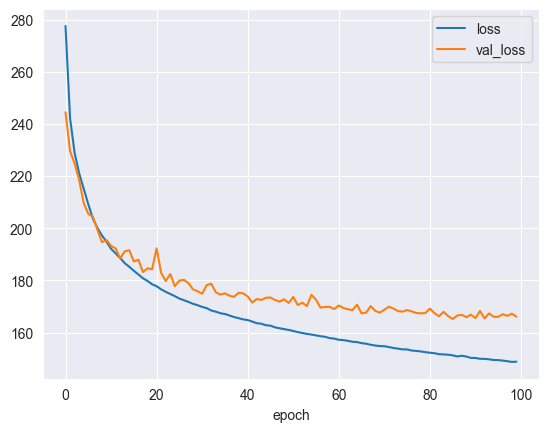

In [64]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
hist.plot(x='epoch', y=['loss', 'val_loss'])


In [65]:
test_results['dnn model more layers'] = dnn_model_more_layers.evaluate(
    test_df, test_labels, verbose=0)
test_results

{'linear model': [321.8163757324219, 321.8163757324219, 0.0],
 'dnn model': 212.19781494140625,
 'dnn model more neurons': 200.63766479492188,
 'dnn model more layers': 163.87429809570312}

The result is getting better but still not good enough. I will try to improve the results by adding more layers with more neurons. But first I will try to improve the performance fo the dnn model.

### 4.5 Improve performance of DNN model
For Performance improvement I will allocate more  memory to the model and start with a batch size of 64.

<Axes: xlabel='epoch'>

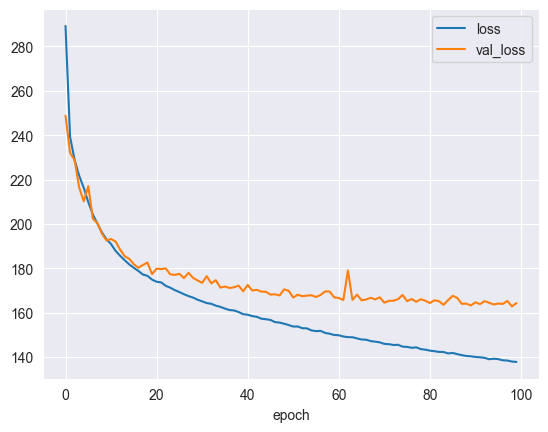

In [67]:
dnn_model_more_neurons_and_layers = keras.Sequential([
    normalizer,
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(1)
])

dnn_model_more_neurons_and_layers.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

history = dnn_model_more_neurons_and_layers.fit(
    train_df, train_labels,
    batch_size=128, # set the batch size
    epochs=100,
    validation_split = 0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
hist.plot(x='epoch', y=['loss', 'val_loss'])

In [68]:
test_results['dnn model more neurons and layers'] = dnn_model_more_neurons_and_layers.evaluate(
    test_df, test_labels, verbose=0)
test_results

{'linear model': [321.8163757324219, 321.8163757324219, 0.0],
 'dnn model': 212.19781494140625,
 'dnn model more neurons': 200.63766479492188,
 'dnn model more layers': 163.87429809570312,
 'dnn model more neurons and layers': 161.7916717529297}

In [ ]:
dnn_model_more_neurons_and_layers_two = keras.Sequential([
    normalizer,
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(1)
])

dnn_model_more_neurons_and_layers_two.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

history = dnn_model_more_neurons_and_layers_two.fit(
    train_df, train_labels,
    batch_size=256, # set the batch size
    epochs=100,
    validation_split = 0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
hist.plot(x='epoch', y=['loss', 'val_loss'])

In [ ]:
test_results['dnn model more neurons and layers two'] = dnn_model_more_neurons_and_layers_two.evaluate(
    test_df, test_labels, verbose=0)
test_results